<a href="https://colab.research.google.com/github/atreyarawat123/trading-algos/blob/main/BollingerStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AAPL Bollinger

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files # Use to load data on Google Colab
files.upload() # Use to load data on Google Colab

Saving AAPL.csv to AAPL (7).csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-01-21,79.297501,79.754997,79.000000,79.142502,78.464882,110843200\n2020-01-22,79.644997,79.997498,79.327499,79.425003,78.744957,101832400\n2020-01-23,79.480003,79.889999,78.912498,79.807503,79.124184,104472000\n2020-01-24,80.062500,80.832497,79.379997,79.577499,78.896149,146537600\n2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000\n2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000\n2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200\n2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200\n2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400\n2020-02-03,76.074997,78.372498,75.555000,77.165001,76.504311,173985600\n2020-02-04,78.827499,79.910004,78.407501,79.712502,79.029999,136616400\n2020-02-05,80.879997,81.190002,79.737503,80.362503,79.674438,118826800\n2020-02-06,80.642502,81.305000,80.065002,81.302498,80.606384,105425600\n2020-0

In [ ]:
#Store the data
df = pd.read_csv('AAPL.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-21,2020-01-21,79.297501,79.754997,79.000000,79.142502,78.464882,110843200
2020-01-22,2020-01-22,79.644997,79.997498,79.327499,79.425003,78.744957,101832400
2020-01-23,2020-01-23,79.480003,79.889999,78.912498,79.807503,79.124184,104472000
2020-01-24,2020-01-24,80.062500,80.832497,79.379997,79.577499,78.896149,146537600
2020-01-27,2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
...,...,...,...,...,...,...,...
2021-01-13,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
2021-01-14,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800
2021-01-15,2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500
2021-01-19,2021-01-19,127.779999,128.710007,126.940002,127.830002,127.830002,90296400


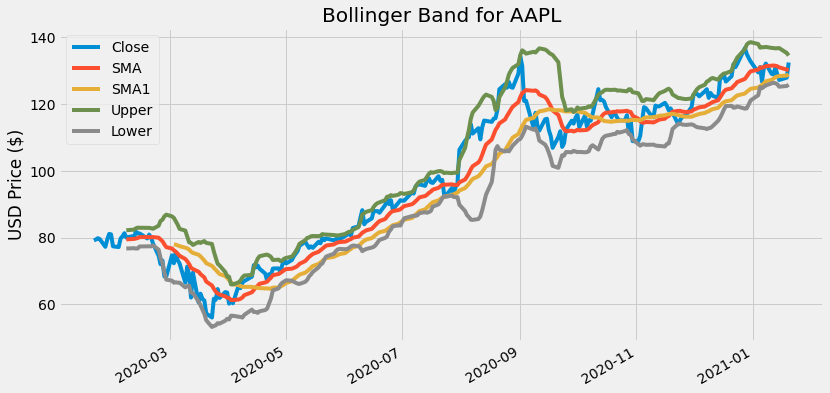

In [ ]:
#Get the time period (30 days)
period = 14
period1 = 30
#Calculating the Simple Moving Average
df['SMA'] = df['Close'].rolling(window=period).mean()
df['SMA1'] = df['Close'].rolling(window=period1).mean()

# Get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std() 
df['STD1'] = df['Close'].rolling(window=period1).std() 

#Calculate the Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
#Calculate the Lower Bollinger Band
df['Lower'] = df['SMA'] - (df['STD'] * 2)
column_list = ['Close', 'SMA', 'SMA1', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2,6.4)) 
plt.title('Bollinger Band for AAPL')
plt.ylabel('USD Price ($)')
plt.show();

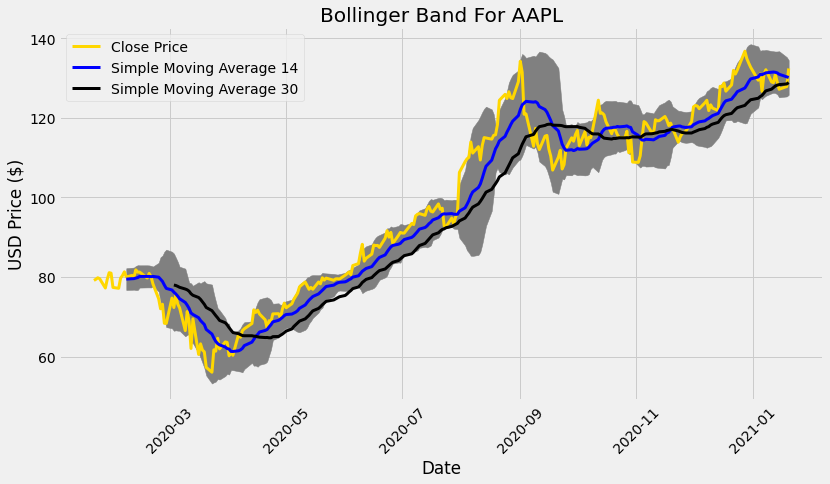

In [ ]:
#Plot and shade the area between the two Bollinger bands
fig = plt.figure(figsize=(12.2,6.4)) 
#Add the subplot
ax = fig.add_subplot(1,1,1) 
# Get the index values of the DataFrame
x_axis = df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, df['Close'], color='gold', lw=3, label = 'Close Price') 
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label = 'Simple Moving Average 14')
ax.plot(x_axis, df['SMA1'], color='black', lw=3, label = 'Simple Moving Average 30')

# Set the Title & Show the Image
ax.set_title('Bollinger Band For AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();

In [ ]:
#Create a new data frame
new_df = df[period-1:]
#Show the new data frame
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA1,STD,STD1,Upper,Lower
2020-02-10,2020-02-10,78.544998,80.387497,78.462502,80.387497,79.888359,109348800,79.532001,NaN,1.337636,NaN,82.207274,76.856728
2020-02-11,2020-02-11,80.900002,80.974998,79.677498,79.902496,79.406372,94323200,79.582667,NaN,1.336222,NaN,82.255111,76.910223
2020-02-12,2020-02-12,80.367500,81.805000,80.367500,81.800003,81.292099,113730400,79.741000,NaN,1.451908,NaN,82.644817,76.837184
2020-02-13,2020-02-13,81.047501,81.555000,80.837502,81.217499,80.713219,94747600,79.835000,NaN,1.501324,NaN,82.837647,76.832353
2020-02-14,2020-02-14,81.184998,81.495003,80.712502,81.237503,80.733086,80113600,79.945667,NaN,1.541628,NaN,83.028922,76.862412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800,131.429334,126.278286,2.514090,5.828772,136.457515,126.401153
2021-01-14,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800,131.231334,126.708572,2.591814,5.426296,136.414961,126.047707
2021-01-15,2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111598500,130.976667,127.050572,2.799713,5.041222,136.576094,125.377240
2021-01-19,2021-01-19,127.779999,128.710007,126.940002,127.830002,127.830002,90296400,130.700667,127.387714,2.897162,4.662899,136.494991,124.906342


In [ ]:
# Create a function to get the buy and sell signals
def get_signal(data):
  buy_signal = [] #buy list
  sell_signal = [] #sell list

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: #Then you should sell 
      #print('SELL')
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: #Then you should buy
      #print('BUY')
      sell_signal.append(np.nan)
      buy_signal.append(data['Close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal, sell_signal)

In [ ]:
#Create new columns for the buy and sell signals
new_df['Buy'] =  get_signal(new_df)[0]
new_df['Sell'] =  get_signal(new_df)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


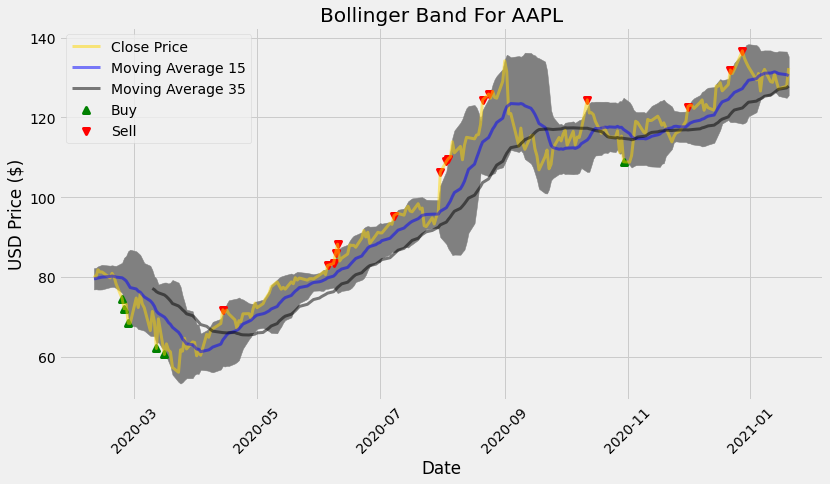

In [ ]:
#Plot all of the data
#Get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4)) 
ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
# Get the index values of the DataFrame
x_axis = new_df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, new_df['Close'], color='gold', lw=3, label = 'Close Price',alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label = 'Moving Average 15',alpha = 0.5)
ax.plot(x_axis, new_df['SMA1'], color='black', lw=3, label = 'Moving Average 35',alpha = 0.5)

ax.scatter(x_axis, new_df['Buy'] , color='green', lw=3, label = 'Buy',marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'] , color='red', lw=3, label = 'Sell',marker = 'v', alpha = 1)
ax.set_title('Bollinger Band For AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();

#AMZN

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files # Use to load data on Google Colab
files.upload() # Use to load data on Google Colab

Saving AMZN2.csv to AMZN2 (4).csv


{'AMZN2.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-08-09,1828.949951,1831.089966,1802.219971,1807.579956,1807.579956,2879800\n2019-08-12,1795.989990,1800.979980,1777.000000,1784.920044,1784.920044,2905500\n2019-08-13,1783.000000,1831.739990,1780.000000,1824.339966,1824.339966,3994000\n2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600\n2019-08-15,1781.989990,1788.000000,1761.959961,1776.119995,1776.119995,3759100\n2019-08-16,1792.890015,1802.910034,1784.550049,1792.569946,1792.569946,3018000\n2019-08-19,1818.079956,1826.000000,1812.609985,1816.119995,1816.119995,2816300\n2019-08-20,1814.500000,1816.819946,1799.880005,1801.380005,1801.380005,1929500\n2019-08-21,1819.390015,1829.579956,1815.000000,1823.540039,1823.540039,2031800\n2019-08-22,1828.000000,1829.410034,1800.099976,1804.660034,1804.660034,2653500\n2019-08-23,1793.030029,1804.900024,1745.229980,1749.619995,1749.619995,5270800\n2019-08-26,1766.910034,1770.000000,1743.510010,1768.869995,17

In [ ]:
#Store the data
df = pd.read_csv('AMZN2.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-09,2019-08-09,1828.949951,1831.089966,1802.219971,1807.579956,1807.579956,2879800
2019-08-12,2019-08-12,1795.989990,1800.979980,1777.000000,1784.920044,1784.920044,2905500
2019-08-13,2019-08-13,1783.000000,1831.739990,1780.000000,1824.339966,1824.339966,3994000
2019-08-14,2019-08-14,1793.010010,1795.650024,1757.219971,1762.959961,1762.959961,4893600
2019-08-15,2019-08-15,1781.989990,1788.000000,1761.959961,1776.119995,1776.119995,3759100
...,...,...,...,...,...,...,...
2021-08-02,2021-08-02,3353.100098,3358.919922,3317.000000,3331.479980,3331.479980,3353900
2021-08-03,2021-08-03,3340.719971,3391.000000,3299.770020,3366.239990,3366.239990,4157300
2021-08-04,2021-08-04,3379.350098,3388.879883,3345.560059,3354.719971,3354.719971,2183900
2021-08-05,2021-08-05,3356.219971,3389.000000,3340.919922,3375.989990,3375.989990,2433500


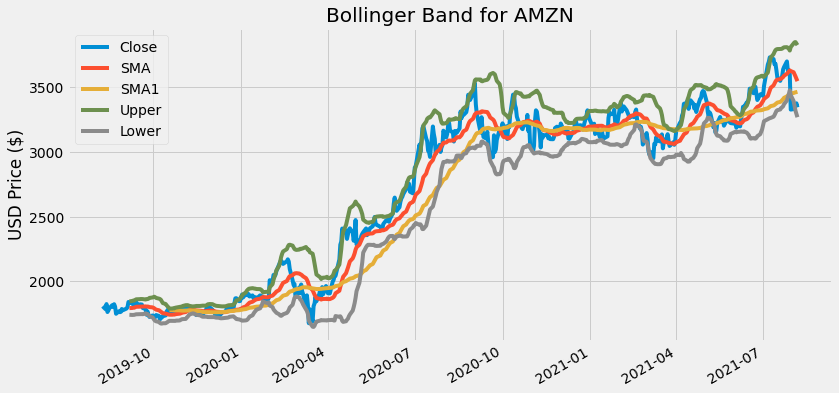

In [ ]:
#Get the time period (30 days)
period = 20
period1 = 50
#Calculating the Simple Moving Average
df['SMA'] = df['Close'].rolling(window=period).mean()
df['SMA1'] = df['Close'].rolling(window=period1).mean()

# Get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std() 
df['STD1'] = df['Close'].rolling(window=period1).std() 

#Calculate the Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
#Calculate the Lower Bollinger Band
df['Lower'] = df['SMA'] - (df['STD'] * 2)
#Create a list of columns to keep
column_list = ['Close', 'SMA', 'SMA1', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2,6.4)) 
plt.title('Bollinger Band for AMZN')
plt.ylabel('USD Price ($)')
plt.show();

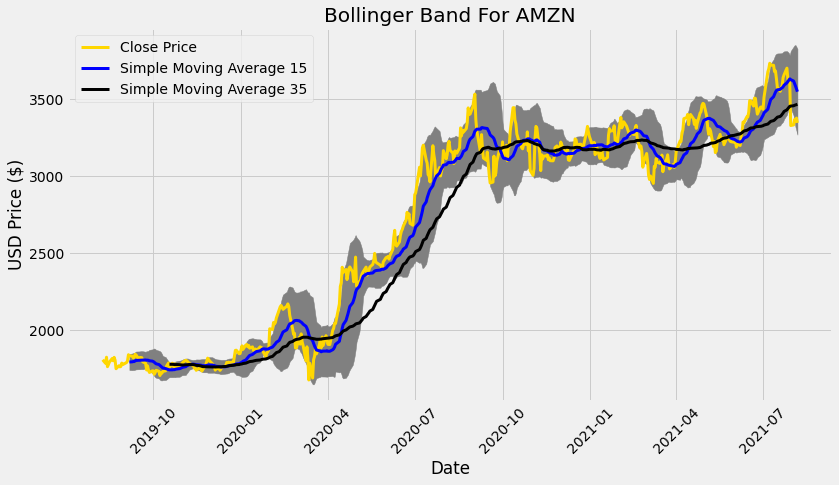

In [ ]:
#Plot and shade the area between the two Bollinger bands
fig = plt.figure(figsize=(12.2,6.4)) 
#Add the subplot
ax = fig.add_subplot(1,1,1) 
# Get the index values of the DataFrame
x_axis = df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, df['Close'], color='gold', lw=3, label = 'Close Price') 
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label = 'Simple Moving Average 15')
ax.plot(x_axis, df['SMA1'], color='black', lw=3, label = 'Simple Moving Average 35')

# Set the Title & Show the Image
ax.set_title('Bollinger Band For AMZN')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();

In [ ]:
#Create a new data frame
new_df = df[period-1:]
#Show the new data frame
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA1,STD,STD1,Upper,Lower
2019-09-06,2019-09-06,1838.219971,1840.650024,1826.400024,1833.510010,1833.510010,2496900,1793.306995,NaN,25.844074,NaN,1844.995143,1741.618846
2019-09-09,2019-09-09,1841.000000,1850.000000,1824.609985,1831.349976,1831.349976,2999500,1794.495496,NaN,27.053269,NaN,1848.602033,1740.388959
2019-09-10,2019-09-10,1822.750000,1825.810059,1805.339966,1820.550049,1820.550049,2613900,1796.276996,NaN,27.557961,NaN,1851.392918,1741.161074
2019-09-11,2019-09-11,1812.140015,1833.420044,1809.079956,1822.989990,1822.989990,2432800,1796.209497,NaN,27.487170,NaN,1851.183837,1741.235157
2019-09-12,2019-09-12,1837.630005,1853.660034,1834.280029,1843.550049,1843.550049,2823500,1800.239001,NaN,28.252810,NaN,1856.744621,1743.733382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,2021-08-02,3353.100098,3358.919922,3317.000000,3331.479980,3331.479980,3353900,3616.182996,3455.660591,111.388252,172.700351,3838.959500,3393.406492
2021-08-03,2021-08-03,3340.719971,3391.000000,3299.770020,3366.239990,3366.239990,4157300,3600.707996,3458.923789,123.517412,169.339163,3847.742819,3353.673172
2021-08-04,2021-08-04,3379.350098,3388.879883,3345.560059,3354.719971,3354.719971,2183900,3583.614990,3461.118389,132.853244,167.207668,3849.321478,3317.908502
2021-08-05,2021-08-05,3356.219971,3389.000000,3340.919922,3375.989990,3375.989990,2433500,3565.843994,3463.457187,135.782012,165.128492,3837.408018,3294.279970


In [ ]:
# Create a function to get the buy and sell signals
def get_signal(data):
  buy_signal = [] #buy list
  sell_signal = [] #sell list

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: #Then you should sell 
      #print('SELL')
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: #Then you should buy
      #print('BUY')
      sell_signal.append(np.nan)
      buy_signal.append(data['Close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal, sell_signal)

In [ ]:
#Create new columns for the buy and sell signals
new_df['Buy'] =  get_signal(new_df)[0]
new_df['Sell'] =  get_signal(new_df)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


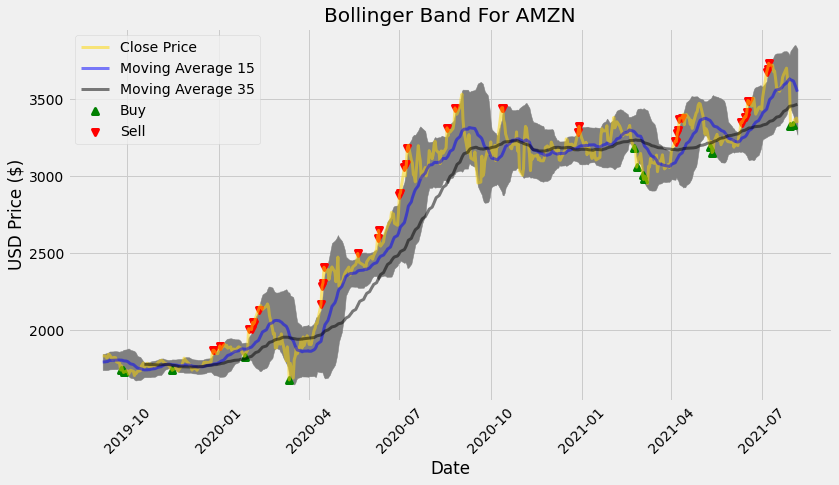

In [ ]:
#Plot all of the data
#Get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4)) 
ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
# Get the index values of the DataFrame
x_axis = new_df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, new_df['Close'], color='gold', lw=3, label = 'Close Price',alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label = 'Moving Average 15',alpha = 0.5)
ax.plot(x_axis, new_df['SMA1'], color='black', lw=3, label = 'Moving Average 35',alpha = 0.5)

ax.scatter(x_axis, new_df['Buy'] , color='green', lw=3, label = 'Buy',marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'] , color='red', lw=3, label = 'Sell',marker = 'v', alpha = 1)
ax.set_title('Bollinger Band For AMZN')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();